# Peer-graded Assignment: Generating a Correlation Coefficient


The third assignment deals with correlation coefficient. A correlation coefficient assesses the degree of linear relationship between two variables. It ranges from +1 to -1. A correlation of +1 means that there is a perfect, positive, linear relationship between the two variables. A correlation of -1 means there is a perfect, negative linear relationship between the two variables. In both cases, knowing the value of one variable, you can perfectly predict the value of the second. Note that if your research question only includes categorical variables, you can choose other variables from your data set just to get some practice with the tool.

# Instructions

## Generate a correlation coefficient.

Note 1: Two 3+ level categorical variables can be used to generate a correlation coefficient if the the categories are ordered and the average (i.e. mean) can be interpreted. The scatter plot on the other hand will not be useful. In general the scatterplot is not useful for discrete variables (i.e. those that take on a limited number of values).

Note 2: When we square r, it tells us what proportion of the variability in one variable is described by variation in the second variable (a.k.a. RSquared or Coefficient of Determination).

### WHAT TO SUBMIT:

Following completion of the steps described above, create a blog entry where you submit syntax used to generate a correlation coefficient (copied and pasted from your program) along with corresponding output and a few sentences of interpretation. 
Review Criteria

Your assessment will be based on the evidence you provide that you have completed all of the steps. In all cases, consider that the peer assessing your work is likely not an expert in the field you are analyzing.


Data: we will continue to use the Outlook on Life Survey.

Link: https://www.icpsr.umich.edu/icpsrweb/RCMD/studies/35348


## Varibles to explore:


PPAGE: Age

PPEDUCAT: Education (Categorical)

PPETHM: Race / Ethnicity

W1_N1A How would you rate people on welfare?

W1_N1D: How would you rate Whites?

W1_N1G: How would you rate gays/lesbians?

W1_N1I: How would you rate Congress?

W1_N1J: How would you rate the wealthiest 1%?

W1_N1K: How would you rate the unemployed?

W1_N1L: How would you rate unmarried mothers?

W1_N1M: How would you rate undocumented immigrants?

W1_N1N: How would you rate public school teachers?

In [15]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
data_from = pd.read_csv('../../datasets/ool_pds.csv', low_memory=False)

## Select the variables for exploration

In [17]:
data = data_from[['PPAGE', 'PPEDUCAT', 'PPETHM', 'W1_N1A', 'W1_N1D', 'W1_N1G', 'W1_N1I', 'W1_N1J', 
                  'W1_N1K', 'W1_N1L', 'W1_N1M', 'W1_N1N']].copy()

In [18]:
data.head()

,PPAGE,PPEDUCAT,PPETHM,W1_N1A,W1_N1D,W1_N1G,W1_N1I,W1_N1J,W1_N1K,W1_N1L,W1_N1M,W1_N1N
0,56,2,4,50,50,0,60,50,50,50,50,50
1,59,1,2,80,50,0,10,15,70,60,10,80
2,36,4,2,70,78,55,55,15,80,90,70,100
3,70,4,2,50,50,100,40,1,50,100,30,100
4,37,4,1,30,-1,-1,15,15,40,40,15,70


In [19]:
data.columns = ['age', 'edu', 'race', 'welfare', 'white', 'gays', 'congress', 'rich1', 'unemployed',
               'mother', 'immigrants', 'teachers']

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2294.0,48.899303,16.457583,18.0,36.0,51.0,62.0,81.0
edu,2294.0,2.806016,0.975647,1.0,2.0,3.0,4.0,4.0
race,2294.0,1.815606,0.827725,1.0,1.0,2.0,2.0,5.0
welfare,2294.0,83.614211,177.877455,-1.0,40.0,50.0,70.0,998.0
white,2294.0,95.629468,165.648334,-1.0,50.0,70.0,85.0,998.0
gays,2294.0,95.956844,203.805058,-1.0,40.0,50.0,80.0,998.0
congress,2294.0,75.812990,195.378451,-1.0,15.0,40.0,50.0,998.0
rich1,2294.0,102.053618,240.327383,-1.0,15.0,50.0,60.0,998.0
unemployed,2294.0,95.384917,187.429109,-1.0,50.0,60.0,80.0,998.0
mother,2294.0,94.789015,178.053839,-1.0,50.0,60.0,85.0,998.0


In [21]:
# change cell values -1 Refused and 998 Don't Recognize to NaN

data = data.applymap(lambda x: np.NaN if x == -1.0 or x == 998.0 else x)
data.describe()

,age,edu,race,welfare,white,gays,congress,rich1,unemployed,mother,immigrants,teachers
count,2294.000000,2294.000000,2294.000000,2128.000000,2113.000000,2079.000000,2101.000000,2033.000000,2092.000000,2115.000000,2060.000000,2144.000000
mean,48.899303,2.806016,1.815606,51.719455,69.393280,53.607023,36.746787,40.592228,60.281071,63.219385,36.746117,74.072761
std,16.457583,0.975647,0.827725,23.997860,21.908234,29.649119,24.549147,27.943815,23.889879,23.720106,27.572997,21.721530
min,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,1.000000,40.000000,50.000000,40.000000,15.000000,15.000000,50.000000,50.000000,15.000000,60.000000
50%,51.000000,3.000000,2.000000,50.000000,70.000000,50.000000,40.000000,50.000000,60.000000,60.000000,40.000000,80.000000
75%,62.000000,4.000000,2.000000,70.000000,85.000000,75.000000,50.000000,50.000000,75.000000,85.000000,50.000000,90.000000
max,81.000000,4.000000,5.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [22]:
data.tail()

,age,edu,race,welfare,white,gays,congress,rich1,unemployed,mother,immigrants,teachers
2289,55,4,2,60.0,70.0,15.0,60.0,0.0,85.0,70.0,0.0,100.0
2290,26,3,2,60.0,100.0,0.0,15.0,0.0,0.0,70.0,40.0,85.0
2291,29,3,1,30.0,50.0,50.0,60.0,40.0,50.0,50.0,40.0,70.0
2292,49,2,1,15.0,100.0,70.0,30.0,0.0,15.0,100.0,0.0,100.0
2293,48,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 12 columns):
age           2294 non-null int64
edu           2294 non-null int64
race          2294 non-null int64
welfare       2128 non-null float64
white         2113 non-null float64
gays          2079 non-null float64
congress      2101 non-null float64
rich1         2033 non-null float64
unemployed    2092 non-null float64
mother        2115 non-null float64
immigrants    2060 non-null float64
teachers      2144 non-null float64
dtypes: float64(9), int64(3)
memory usage: 215.1 KB


### Big picture: Difficult to see the correlation

Text(0.5,1,'Scatterplot for the Association Between age and welfare')

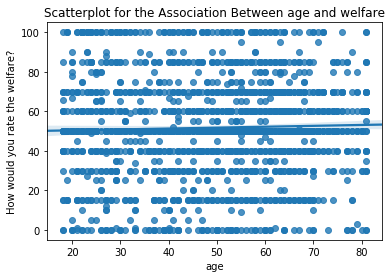

In [24]:
X = 'age'
y = 'welfare'
scatter = sns.regplot(x=X, y=y, fit_reg=True, data=data)
plt.xlabel(f'{X}')
plt.ylabel(f'How would you rate the {y}?')
plt.title(f'Scatterplot for the Association Between {X} and {y}')

In [14]:
# We will learn this (center x variable) in later courses.
#
# data['age_c'] = data[X] - data[X].mean()
# X = 'age_c'
# y = 'welfare'
# scatter = sns.regplot(x=X, y=y, fit_reg=True, data=data)
# plt.xlabel(f'{X}')
# plt.ylabel(f'How would you rate the {y}?')
# plt.title(f'Scatterplot for the Association Between {X} and {y}')

Text(0.5,1,'Scatterplot for the Association Between age and gays')

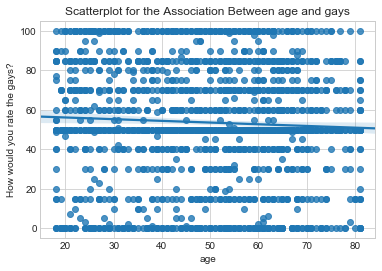

In [173]:
X = 'age'
y = 'gays'
scatter = sns.regplot(x=X, y=y, fit_reg=True, data=data)
plt.xlabel(f'{X}')
plt.ylabel(f'How would you rate the {y}?')
plt.title(f'Scatterplot for the Association Between {X} and {y}')

## Exploration of the data (Grader can skip this!)

* The regression line is almost flat.
* I try to keep only 100 points (randomly) to see if there is anything interesting.



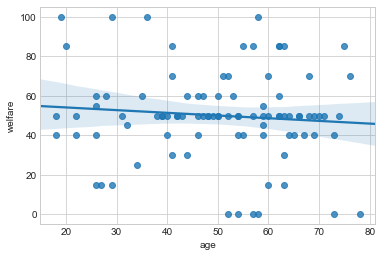

In [174]:
df = data.iloc[np.random.choice(data['age'].count(), 100, replace=False)]
scatter = sns.regplot(x='age', y='welfare', fit_reg=True, data=df)
# plt.scatter(df['age'], df['welfare'], alpha=0.5)
# plt.show()

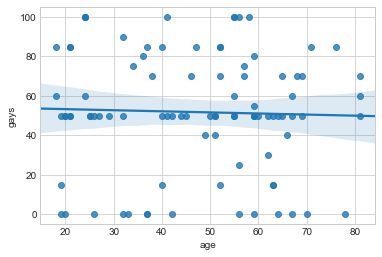

In [175]:
df = data.iloc[np.random.choice(data['age'].count(), 100, replace=False)]
scatter = sns.regplot(x='age', y='gays', fit_reg=True, data=df)

## Further exploration of the data (Grader can skip this!)

### Check every pair visually

* age vs all variables
* race vs all variables
* education vs all variables

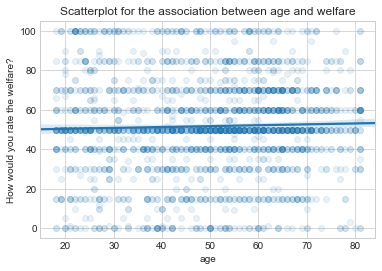

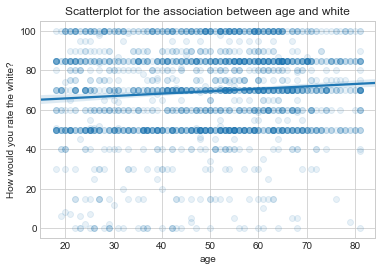

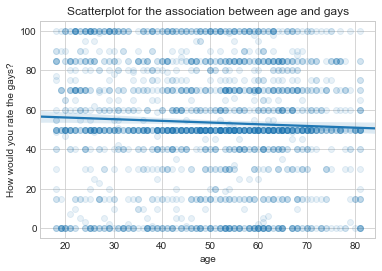

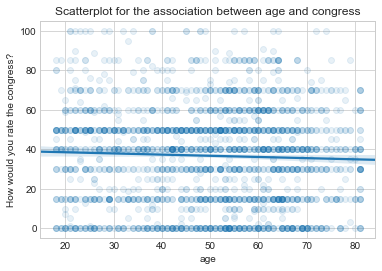

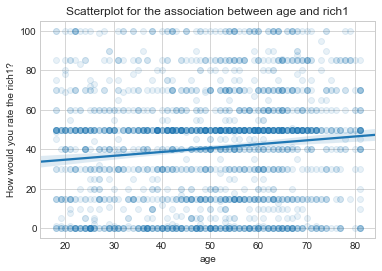

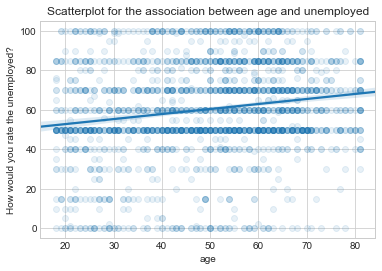

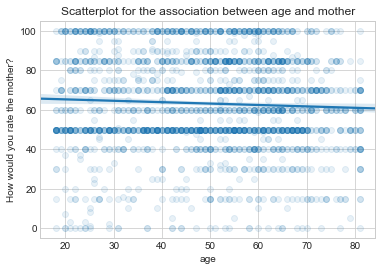

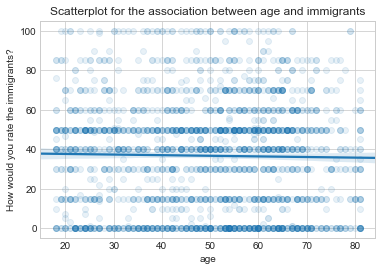

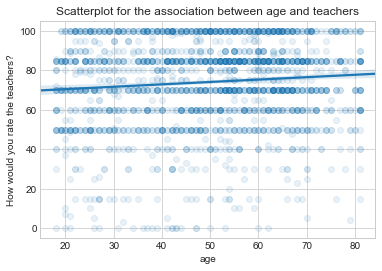

In [176]:
for col in data.columns[3:]:
    X = 'age'
    y = col
    scatter = sns.regplot(x=X, y=y, fit_reg=True, data=data, scatter_kws=dict(alpha=.1))
    plt.xlabel(f'{X}')
    plt.ylabel(f'How would you rate the {y}?')
    plt.title(f'Scatterplot for the association between {X} and {y}')
    plt.show()

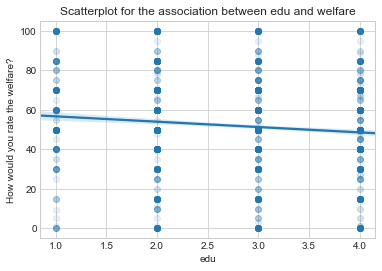

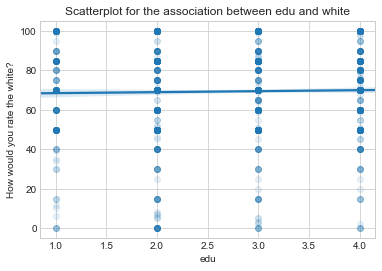

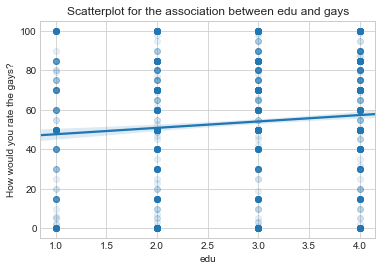

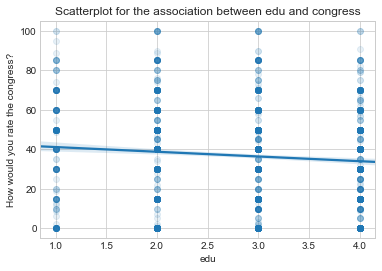

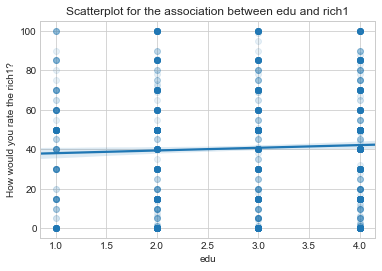

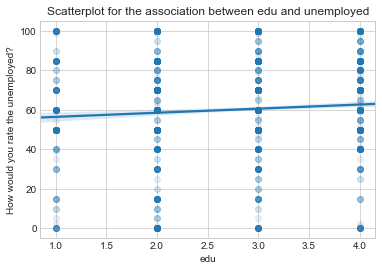

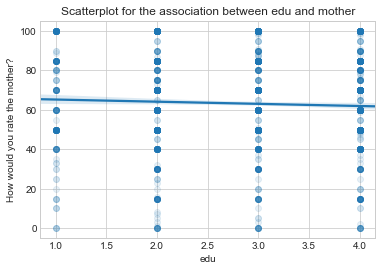

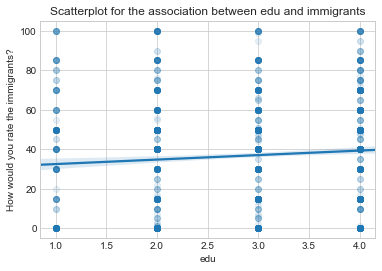

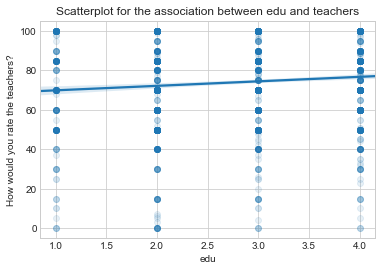

In [177]:
for col in data.columns[3:]:
    X = 'edu'
    y = col
    scatter = sns.regplot(x=X, y=y, fit_reg=True, data=data, scatter_kws=dict(alpha=.1))
    plt.xlabel(f'{X}')
    plt.ylabel(f'How would you rate the {y}?')
    plt.title(f'Scatterplot for the association between {X} and {y}')
    plt.show()

## Practice how to better control xticks (Grader can skip this!)

* Redo race vs all variables

In [178]:
data.race.value_counts()

2    1278
1     814
4     123
3      46
5      33
Name: race, dtype: int64

In [179]:
races = {
    1: 'white', 
    2: 'black', 
    3: 'other', 
    4: 'hispanic', 
    5: '2+ races',
}
# df = data.copy()
# df['race'] = df['race'].map(races)
# df

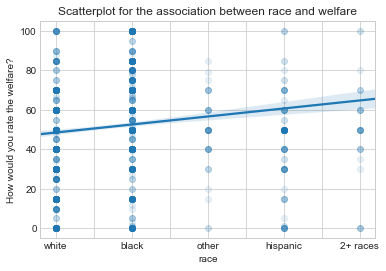

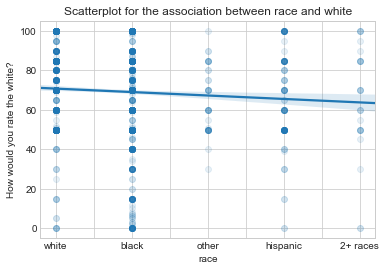

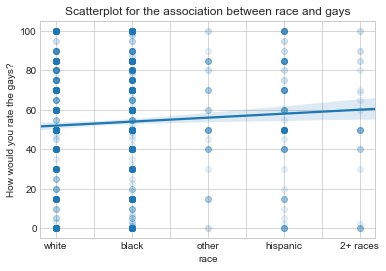

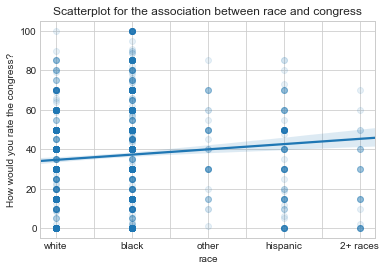

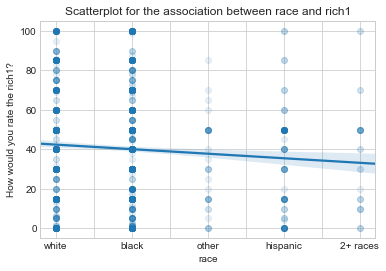

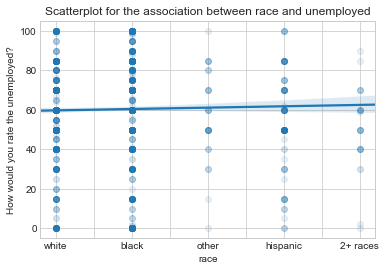

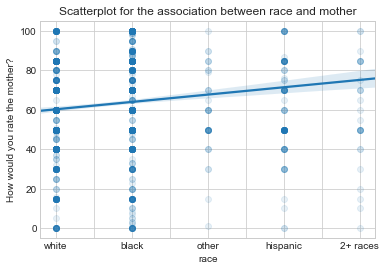

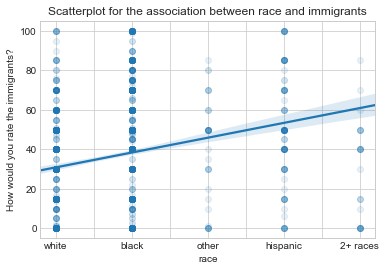

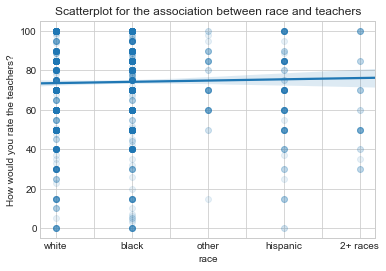

In [180]:
for col in data.columns[3:]:
    X = 'race'
    y = col
    scatter = sns.regplot(x=X, y=y, fit_reg=True, data=data, scatter_kws=dict(alpha=.1))
    scatter.set_xticklabels(labels=['', 'white', '', 'black', '', 'other', '', 'hispanic', '', '2+ races'])
    plt.xlabel(f'{X}')
    plt.ylabel(f'How would you rate the {y}?')
    plt.title(f'Scatterplot for the association between {X} and {y}')
    plt.show()

# Note 1: Examine R (correlation)

* Most of them are close to 0 as shown in visualization
* Highest R is found in: race and rating undocumented immigrants (0.24)

In [181]:
data_clean=data.dropna()

## Correlation coefficient: Quantative X age and Quantative Y rating.

In [182]:
for col in data.columns[3:]:
    X = 'age'
    y = col
    print(f'Association between {X} and rating {y:<10}', end='\t')
    r, p = scipy.stats.pearsonr(data_clean[X], data_clean[y])
    print(f'{r:.4f}, {p:.4f}', end='')
    if p < 0.05:
        print('**')
    else:
        print()

Association between age and rating welfare   	0.0504, 0.0301**
Association between age and rating white     	0.1014, 0.0000**
Association between age and rating gays      	-0.0472, 0.0422**
Association between age and rating congress  	-0.0408, 0.0794
Association between age and rating rich1     	0.0990, 0.0000**
Association between age and rating unemployed	0.1836, 0.0000**
Association between age and rating mother    	-0.0486, 0.0365**
Association between age and rating immigrants	-0.0308, 0.1849
Association between age and rating teachers  	0.1046, 0.0000**


## Correlation coefficient: Categorical X edu and Quantative Y rating

In [183]:
for col in data.columns[3:]:
    X = 'edu'
    y = col
    print(f'Association between {X} and rating {y:<10}', end='\t')
    r, p = scipy.stats.pearsonr(data_clean[X], data_clean[y])
    print(f'{r:.4f}, {p:.4f}', end='')
    if p < 0.05:
        print('**')
    else:
        print()

Association between edu and rating welfare   	-0.0860, 0.0002**
Association between edu and rating white     	0.0334, 0.1505
Association between edu and rating gays      	0.0945, 0.0000**
Association between edu and rating congress  	-0.0863, 0.0002**
Association between edu and rating rich1     	0.0454, 0.0509
Association between edu and rating unemployed	0.0822, 0.0004**
Association between edu and rating mother    	-0.0358, 0.1235
Association between edu and rating immigrants	0.0746, 0.0013**
Association between edu and rating teachers  	0.1148, 0.0000**


## Correlation coefficient: Categorical X race and Quantative Y rating

In [184]:
for col in data.columns[3:]:
    X = 'race'
    y = col
    print(f'Association between {X} and rating {y:<10}', end='\t')
    r, p = scipy.stats.pearsonr(data_clean[X], data_clean[y])
    print(f'{r:.4f}, {p:.4f}', end='')
    if p < 0.05:
        print('**')
    else:
        print()

Association between race and rating welfare   	0.1418, 0.0000**
Association between race and rating white     	-0.0696, 0.0027**
Association between race and rating gays      	0.0579, 0.0126**
Association between race and rating congress  	0.0835, 0.0003**
Association between race and rating rich1     	-0.0656, 0.0047**
Association between race and rating unemployed	0.0247, 0.2877
Association between race and rating mother    	0.1343, 0.0000**
Association between race and rating immigrants	0.2445, 0.0000**
Association between race and rating teachers  	0.0181, 0.4362


# Further Analysis because of very weak correlations

So I decide to further look at sub groups:

* Younger than 30
* Older than 60

Finding:
* R is not much different. (still low)
* But p value is higher (less significant)

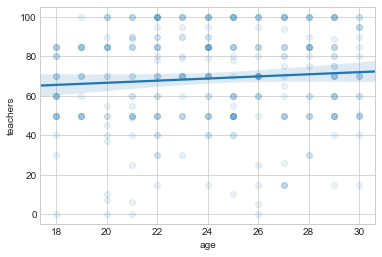

In [185]:
young = data_clean[data_clean['age'] <= 30]
scatter = sns.regplot(x='age', y='teachers', fit_reg=True, data=young, scatter_kws=dict(alpha=.1))

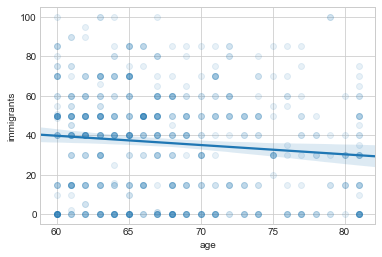

In [186]:
old = data_clean[data_clean['age'] >= 60]
scatter = sns.regplot(x='age', y='immigrants', fit_reg=True, data=old, scatter_kws=dict(alpha=.1))

In [187]:
y = 'welfare'
print(f'Association between people under 30 year olds and rating {y:<10}', end='\t')
r, p = scipy.stats.pearsonr(young['age'], young[y])
print(f'{r:.4f}, {p:.4f}')
y = 'gays'
print(f'Association between people under 30 year olds and rating {y:<10}', end='\t')
r, p = scipy.stats.pearsonr(young['age'], young[y])
print(f'{r:.4f}, {p:.4f}')
y = 'welfare'
print(f'Association between people over 60 year olds and rating {y:<10}', end='\t')
r, p = scipy.stats.pearsonr(old['age'], old[y])
print(f'{r:.4f}, {p:.4f}')
y = 'gays'
print(f'Association between people under 60 year olds and rating {y:<10}', end='\t')
r, p = scipy.stats.pearsonr(old['age'], old[y])
print(f'{r:.4f}, {p:.4f}')

Association between people under 30 year olds and rating welfare   	0.0049, 0.9322
Association between people under 30 year olds and rating gays      	0.0745, 0.1957
Association between people over 60 year olds and rating welfare   	-0.0247, 0.5477
Association between people under 60 year olds and rating gays      	-0.0516, 0.2087


# Conclusion:

I use R (correlation coefficient) and scatter plots to explore the association between several variables because I am interested in knowing how people rate **notable groups**.

I'm very surprised that the R is very low across the board and that's why I continue to research beyond the scope of this assignment.

For example, the R analysis for age and ratings of people on welare, white people, gay people, congress people, richest 1%, unemployed people, unmarried mothers, undocumented immigrants and public school teachers. We observed the R lower than 0.11 (or higher than -0.11) although many of them are significant (p value < 0.05)

## Note 2:

Take the largest R here:

* Association between race and rating immigrants: R 0.2445, p-value 0.0000**

R squared is about 6% so if we accept the model, X (race) can only explain 6% of the variance in Y (rating of immigrants) and 94% is unknown.

In [28]:
# R squared
0.2445**2

0.05978025

# More exploration about the samples (Grader can skip below)

1. age distribution
2. rating distribution over 'welare', 'gays', and 'teachers'
3. detailed counts of 'welfare'
4. line charts of 'welfare' by racial groups
5. look at rating of 'gays', 'immigrants' and 'white'.



## age distribution

There is no obvious issue.

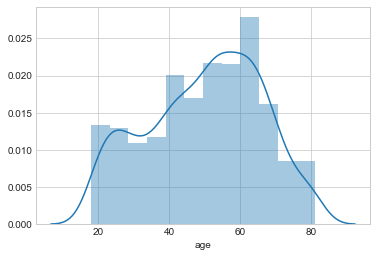

In [219]:
sns.set_style("whitegrid")
sns.distplot(data_clean.age, bins=12)

# Rating distribution over 'welare', 'gays', and 'teachers'

Public school teachers get better ratings.


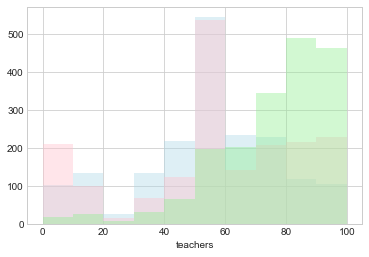

In [226]:
sns.distplot(data_clean.welfare, bins=10, color='lightblue', kde=False)
sns.distplot(data_clean.gays, bins=10, color='pink', kde=False)
sns.distplot(data_clean.teachers, bins=10, color='lightgreen', kde=False)

## detailed counts of 'welfare'

Get to see the real scores

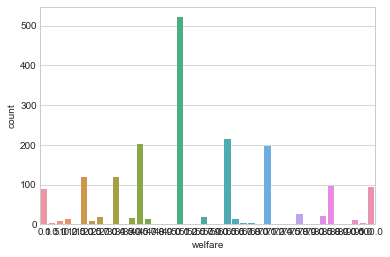

In [190]:
sns.countplot('welfare', data=data_clean)

In [230]:
data_clean['welfare'].value_counts().sort_index()

0.0       90
1.0        4
5.0        8
10.0      14
12.0       1
15.0     120
20.0       9
25.0      18
27.0       1
30.0     119
34.0       1
35.0      15
40.0     202
45.0      13
47.0       1
48.0       1
49.0       2
50.0     521
51.0       2
52.0       1
55.0      18
57.0       1
59.0       1
60.0     215
65.0      13
66.0       3
67.0       3
68.0       1
70.0     196
71.0       1
72.0       1
74.0       1
75.0      27
78.0       1
79.0       2
80.0      21
85.0      97
88.0       1
89.0       1
90.0      10
95.0       3
100.0     93
Name: welfare, dtype: int64

## Line charts of 'welfare' by racial groups

[(0, 100)]

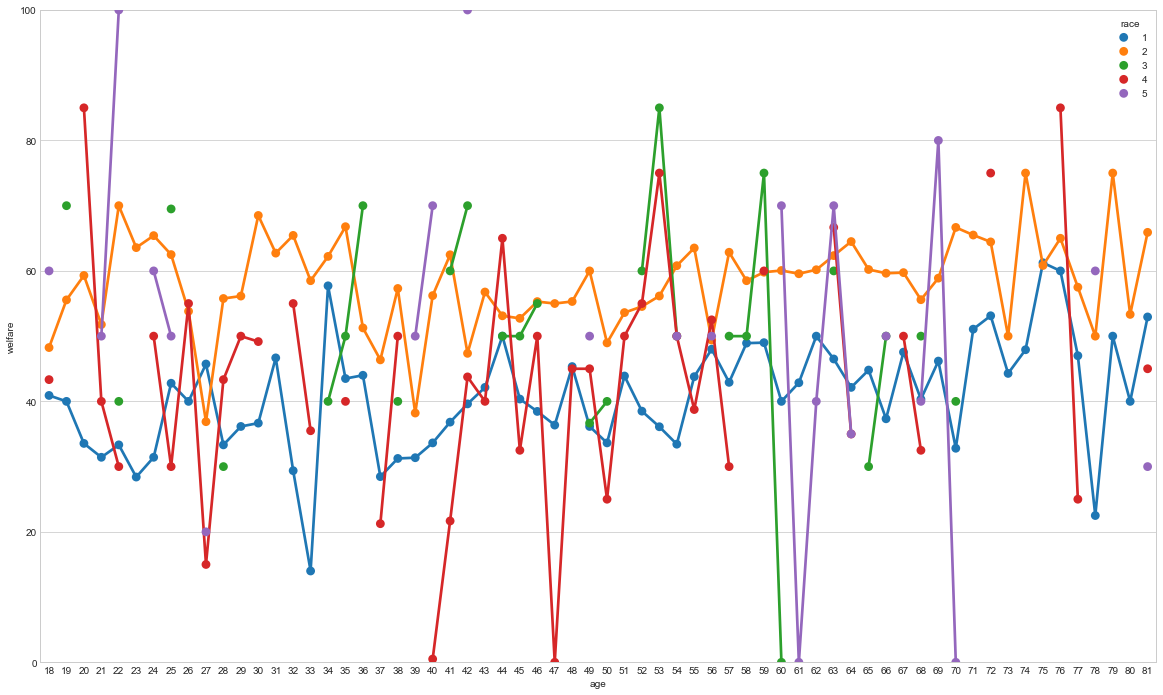

In [212]:
f, ax = plt.subplots(figsize=(20, 12))
g = sns.pointplot(x='age', y='welfare', hue='race', ci=None, data=data_clean)
g.set(ylim=(0, 100))

# races = {
#     1: 'white', 
#     2: 'black', 
#     3: 'other', 
#     4: 'hispanic', 
#     5: '2+ races',
# }

[(0, 100)]

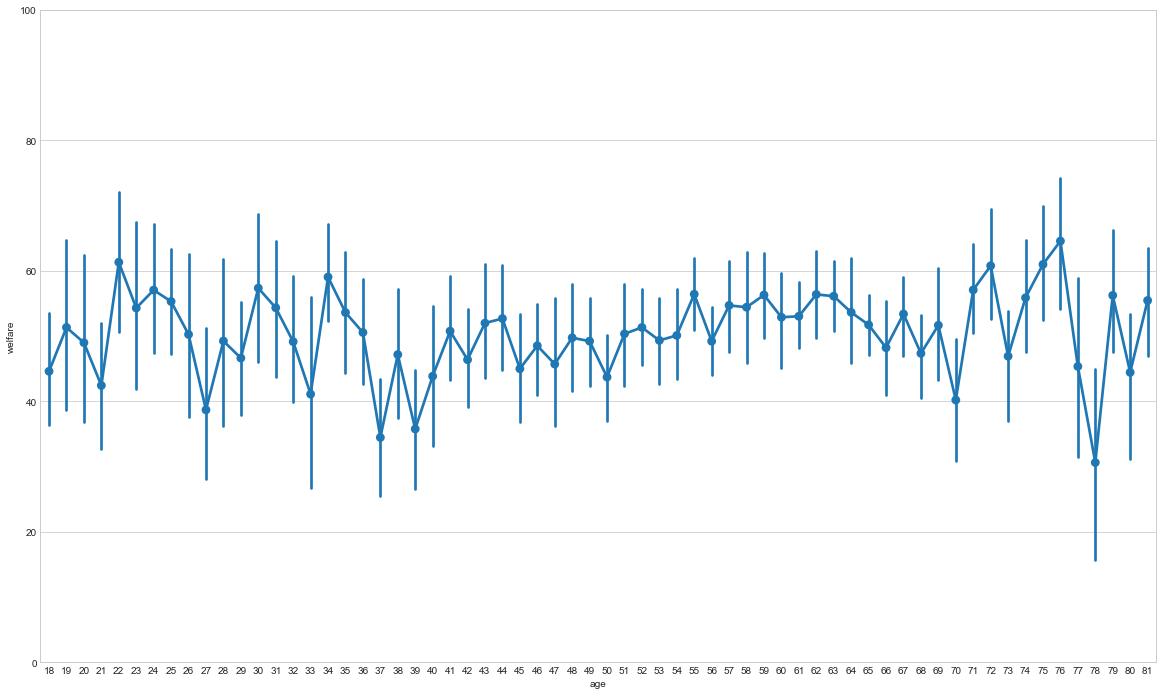

In [197]:
f, ax = plt.subplots(figsize=(20, 12))
g =sns.pointplot(x='age', y='welfare', data=data_clean)
g.set(ylim=(0, 100))

## Look at rating of 'gays', 'immigrants' and 'white'.

Although it seems to have a general trend, seeing how volatile the rating is above ("welfare" rating by racial group), I'm reluctant to make a judgement until further studying this survey.

[(0, 100)]

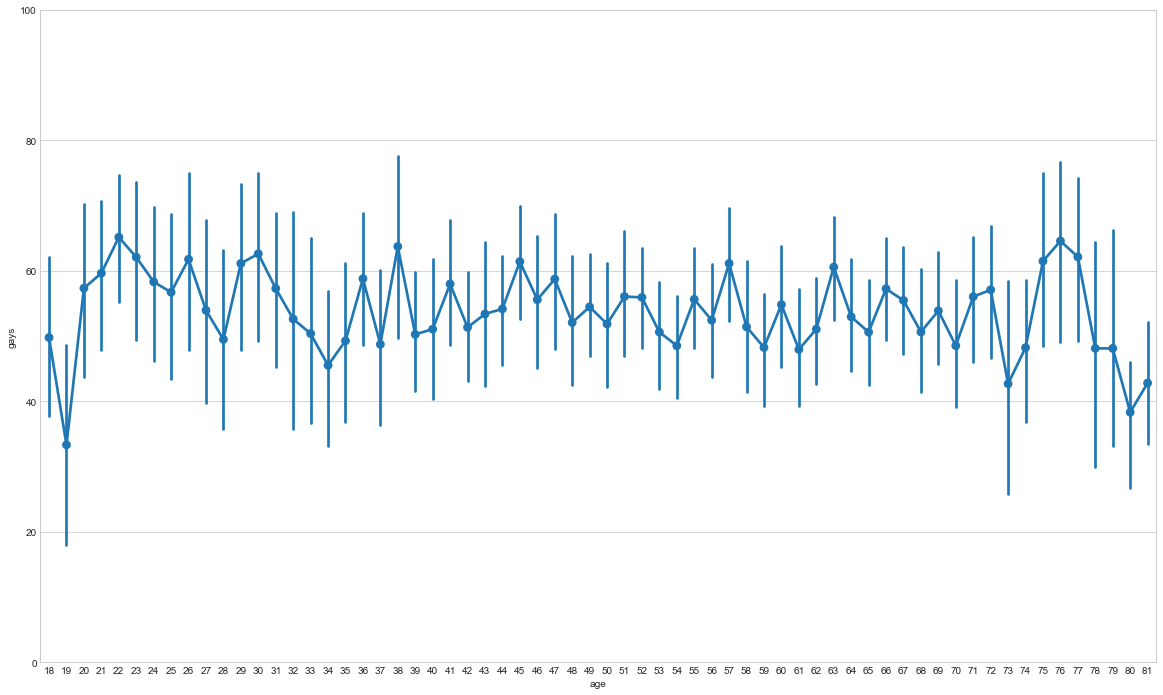

In [200]:
f, ax = plt.subplots(figsize=(20, 12))
g = sns.pointplot(x='age', y='gays', data=data_clean)
g.set(ylim=(0, 100))

[(0, 100)]

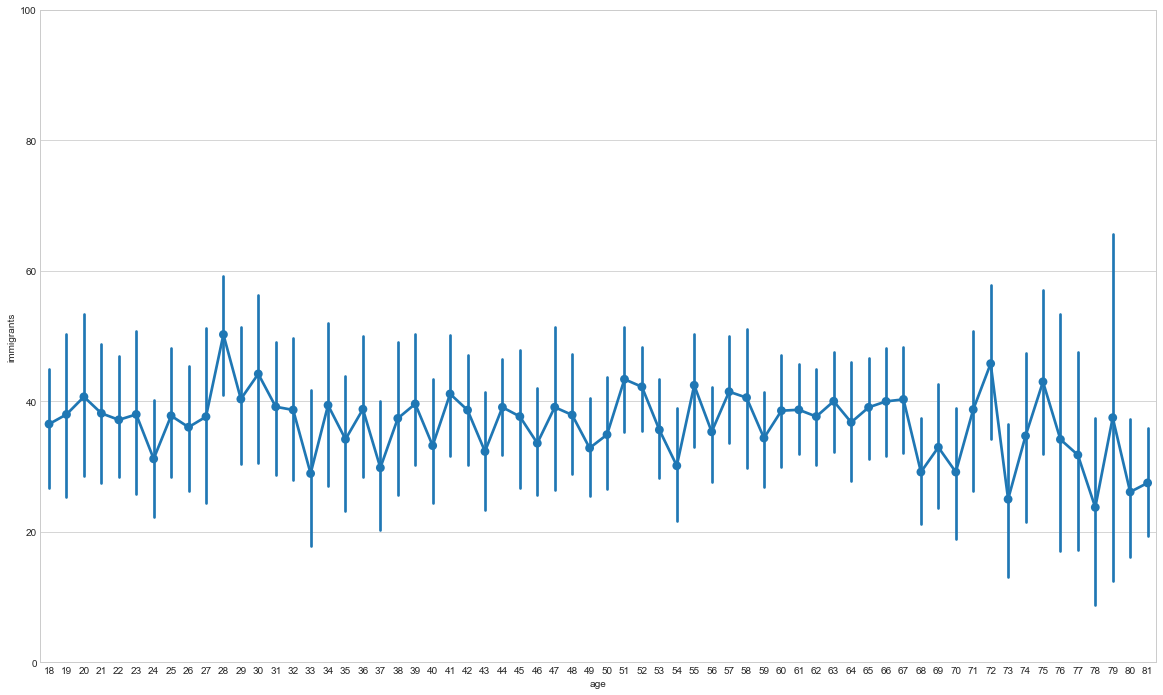

In [201]:
f, ax = plt.subplots(figsize=(20, 12))
g = sns.pointplot(x='age', y='immigrants', data=data_clean)
g.set(ylim=(0, 100))

[(0, 100)]

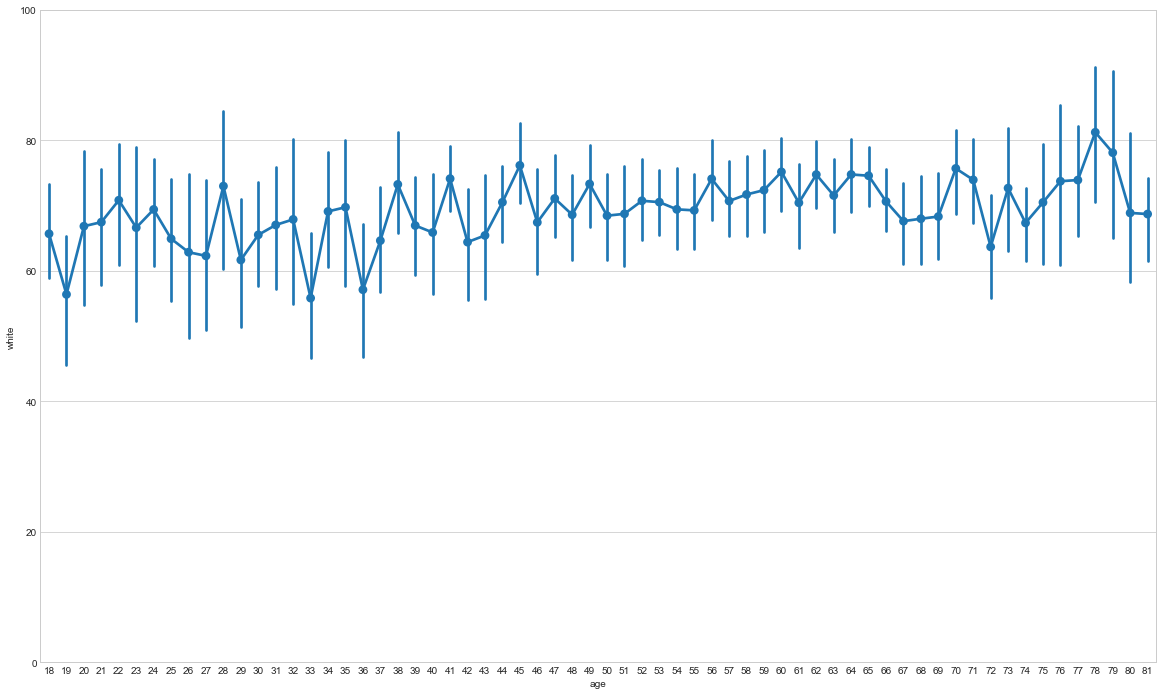

In [202]:
f, ax = plt.subplots(figsize=(20, 12))
g = sns.pointplot(x='age', y='white', data=data_clean)
g.set(ylim=(0, 100))